In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
os.listdir('/kaggle/input/')

['car-evaluation-data-set', 'decision-tree-classifier-tutorial']

In [3]:
os.listdir('/kaggle/input/car-evaluation-data-set')

['car_evaluation.csv']

In [4]:
import pandas as pd 
data=pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


### columnns meaninig

| Column     | Meaning                                                            |
| ---------- | ------------------------------------------------------------------ |
| `buying`   | Buying price (vhigh, high, med, low)                               |
| `maint`    | Maintenance cost (vhigh, high, med, low)                           |
| `doors`    | Number of doors (2, 3, 4, 5more)                                   |
| `persons`  | Capacity in terms of persons (2, 4, more)                          |
| `lug_boot` | Luggage boot size (small, med, big)                                |
| `safety`   | Safety rating (low, med, high)                                     |
| `class`    | Final decision (unacc, acc, good, vgood) ✅ — **This is the label** | 

unacc = unacceptable


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
data.shape

(1727, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
"""
count: Total number of rows with non-null values (here: all 1727 rows).
unique: How many distinct values that feature has.
top: The most frequent value (i.e., the mode).
freq: How many times the top value appears.
"""
data.describe().T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [10]:
data['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [11]:
X=data.drop('class',axis=1)
y=data['class']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)

(1381, 6) (346, 6)


In [13]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [14]:
## we have used ordinal because it just gives each category a number and DT dont care about actual numeric value so always use ordinal or label encoder with RF and DT
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
x_train_encoded=OE.fit_transform(x_train)
x_test_encoded=OE.transform(x_test)

In [15]:
x_train_encoded

array([[3., 0., 0., 0., 2., 1.],
       [2., 3., 1., 1., 2., 2.],
       [1., 1., 3., 0., 0., 0.],
       ...,
       [0., 1., 3., 2., 0., 1.],
       [1., 0., 2., 0., 2., 0.],
       [2., 2., 1., 2., 2., 0.]])

# GINI classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(max_depth=3,random_state=42)
dt_clf.fit(x_train_encoded,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
train_preds=dt_clf.predict(x_train_encoded)
test_preds=dt_clf.predict(x_test_encoded)

In [18]:
from sklearn.metrics import accuracy_score
train_score=accuracy_score(y_train,train_preds)
test_score=accuracy_score(y_test,test_preds)
print('train score = ',train_score*100) #print('Train set score: {:.4f}',dt_clf.score(x_train_encoded, y_train))
print('test_score = ',test_score*100)   #print('Test set score: {:.4f}',dt_clf.score(x_test_encoded, y_test))

train score =  77.9145546705286
test_score =  78.32369942196532


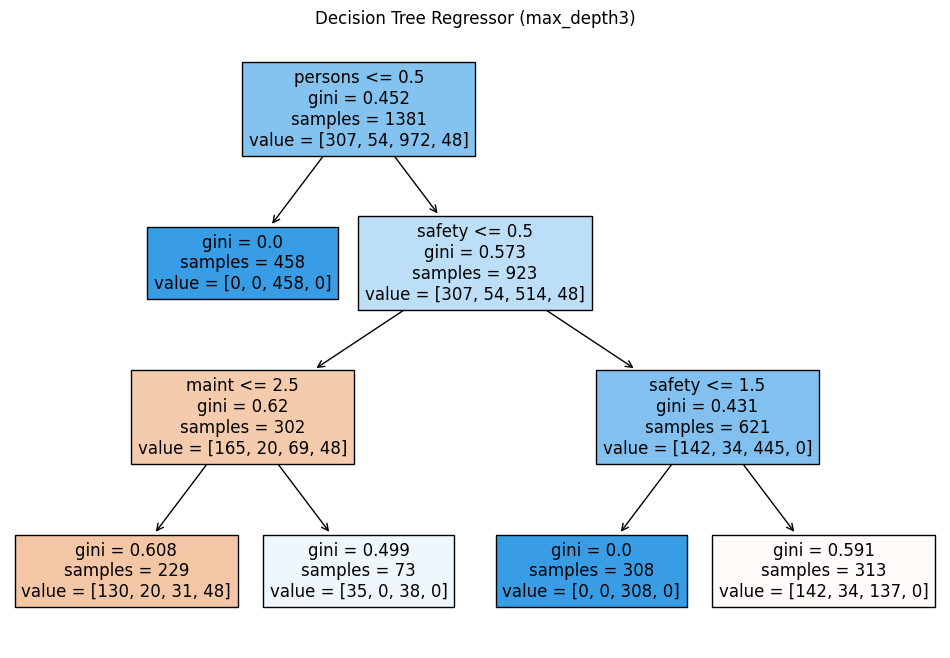

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(dt_clf, 
          filled=True,  
          feature_names=col_names)
plt.title("Decision Tree Regressor (max_depth3)")
plt.show()

[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 458\nvalue = [0, 0, 458, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.573\nsamples = 923\nvalue = [307, 54, 514, 48]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\ngini = 0.62\nsamples = 302\nvalue = [165, 20, 69, 48]'),
 Text(0.125, 0.125, 'gini = 0.608\nsamples = 229\nvalue = [130, 20, 31, 48]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 73\nvalue = [35, 0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.431\nsamples = 621\nvalue = [142, 34, 445, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(0.875, 0.125, 'gini = 0.591\nsamples = 313\nvalue = [142, 34, 137, 0]')]

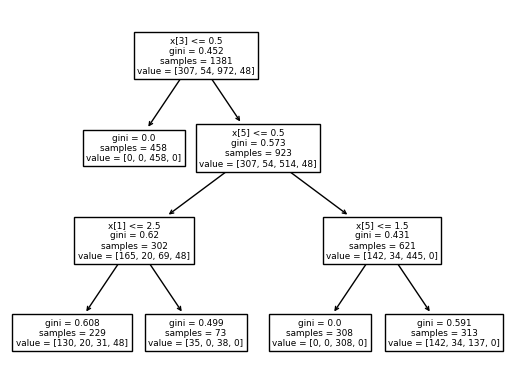

In [20]:
plot_tree(dt_clf.fit(x_train_encoded,y_train))

In [21]:
from sklearn.metrics import confusion_matrix
cmx=confusion_matrix(train_preds,y_train)
print("confusion_matrix is \n " ,cmx)

confusion_matrix is 
  [[272  54 168  48]
 [  0   0   0   0]
 [ 35   0 804   0]
 [  0   0   0   0]]


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         acc       0.51      0.86      0.64        77
        good       0.00      0.00      0.00        15
       unacc       0.95      0.86      0.91       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.78       346
   macro avg       0.36      0.43      0.39       346
weighted avg       0.76      0.78      0.76       346



# ENTROPY calssifier 

In [33]:
dt_clf_ent=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42,class_weight='balanced')
dt_clf_ent.fit(x_train_encoded,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=42)

In [34]:
ent_train_preds=dt_clf_ent.predict(x_train_encoded)
ent_test_preds=dt_clf_ent.predict(x_test_encoded)

In [35]:

train_score_ent=accuracy_score(y_train,ent_train_preds)
test_score_ent=accuracy_score(y_test,ent_test_preds)
print('train score = ',train_score_ent*100) 
print('test_score = ',test_score_ent*100)  

train score =  69.00796524257784
test_score =  67.91907514450867


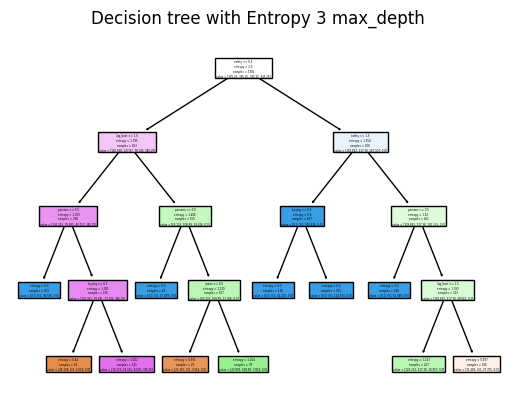

In [36]:
plot_tree(dt_clf_ent,feature_names=col_names,filled=True)
plt.title('Decision tree with Entropy 3 max_depth')
plt.show()

In [37]:
print(classification_report(y_test, ent_test_preds))

              precision    recall  f1-score   support

         acc       0.46      0.21      0.29        77
        good       0.13      0.60      0.22        15
       unacc       1.00      0.81      0.90       237
       vgood       0.33      1.00      0.50        17

    accuracy                           0.68       346
   macro avg       0.48      0.66      0.48       346
weighted avg       0.81      0.68      0.71       346

